Initial value of loss function : 32.07273387745567
J : 31.52357820367621
J : 30.98535072780496
J : 30.457833978703547
J : 29.94081481290925
J : 29.434084328514263
J : 28.937437780758735
J : 28.450674499303542
J : 27.973597807149304
J : 27.50601494116894
J : 27.047736974221586
J : 26.598578738816478
J : 26.158358752295936
J : 25.726899143507154
J : 25.304025580933267
J : 24.889567202254604
J : 24.483356545311644
J : 24.085229480441846
J : 23.695025144162962
J : 23.312585874176023
J : 22.937757145661823
J : 22.57038750884506
J : 22.210328527800954
J : 21.857434720479617
J : 21.51156349992398
J : 21.1725751166574
J : 20.840332602217817
J : 20.51470171381559
J : 20.19555088009257
J : 19.882751147960633
J : 19.57617613049812
J : 19.275701955883115
J : 18.98120721734295
J : 18.69257292409973
J : 18.40968245329205
J : 18.13242150285344
J : 17.860678045328566
J : 17.594342282608434
J : 17.33330660156643
J : 17.077465530577165
J : 16.82671569690058
J : 16.580955784914167
J : 16.340086495176283


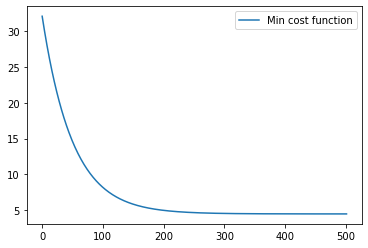

Coefficient : [5.80115277 4.56316442]


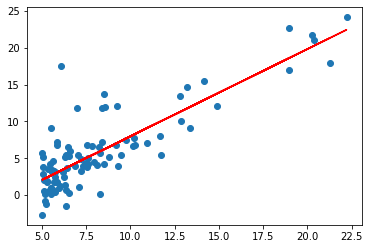

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#Function to compute cost function
#You can use for loop to compute cost function too
#Vectorization is faster and more clear

def compute_cost(X, y, theta):
    #Numbef of training sample
    m = X.shape[0]
    return 1/(2*m) * np.transpose(X@theta - y)@(X@theta-y)

#Batch gradient descent, with X is features, y is outcome, learning rate and epochs is number 
# of learning iteration

def gradient_descent(X, y, learning_rate, epochs):
    #Number of training sample
    m = X.shape[0]
    #Number of features
    n = X.shape[1]
    #Coefficient with all value is zero
    theta = np.zeros(n)
    #Comput loss function
    J = compute_cost(X, y, theta)
    print('Initial value of loss function :',J)
    #Vars
    iter = 0
    converged = False
    min_J = [J]
    while not converged:
        dev = 1/m * X.T@(X@theta - y)
        #simultaneously update coefficient
        theta = theta - learning_rate * dev
        J = compute_cost(X, y, theta)
        print('J :',J)
        if J<=0.01 or iter == epochs:
            converged = True
            print('End of learning !')
        min_J.append(J)
        iter+=1
    plt.plot(min_J, label='Min cost function')
    plt.legend()
    plt.show()
    return theta

if __name__=='__main__':
    #Load data from directory
    data = pd.read_csv('C:/CNTT/DATA/ex1data1.txt', names=['features', 'value'])
    #Split features and value
    X = np.array(data.loc[:,'features']).reshape(-1, 1)
    y = np.array(data.loc[:, 'value'])
    #Normalize features to make better gradient descent algorithm
    #Using Standardization, you can implement for yourself or using 
    #Sklearn library
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    #Add one column for X0 feature
    X0 = np.ones(X.shape[0]).reshape(-1, 1)
    X_scaled = np.column_stack((X0, X_scaled))
    theta = gradient_descent(X_scaled, y, 0.01, 500)
    print('Coefficient :',theta)
    #Plot data to see if algorithm work well
    plt.scatter(X, y, label='Training samples')
    predict_y = X_scaled@theta
    plt.plot(X, predict_y, label='Linear regression',color='red')
    plt.show()
    